In [1]:
import folium
import json
import numpy as np
from folium.features import CustomIcon
import math

In [2]:
# latitude and longitude in Chinese city
cities = {
    # "Shenzhen": [22.543099, 114.057868],     # 深圳
    # "Zhuhai": [22.270978, 113.576677],       # 珠海
    
    # "Zhanjiang": [21.271517, 110.358947],    # 湛江
    # "Haikou": [20.044001, 110.198286],       # 海口
    
    # "Weihai": [37.513068, 122.120420],       # 威海
    # "Dalian": [38.914003, 121.614682],       # 大连
    # "Yantai": [37.463822, 121.447935],       # 烟台

    "Shanghai": [31.230416, 121.473701],     # 上海
    # "Zhoushan": [29.985295, 122.207216],      # 舟山
    # "Ningbo": [29.868336, 121.543990],       # 宁波
    
    "Nantong":[31.9827896, 120.8904588]
}

In [3]:
# define the city map
# tiles in {'OpenStreetMap', 'Stamen  Terrain', 'Stamen Toner', 'Mapbox Bright',CartoDB positron}
city_map = folium.Map(
    location=[39.906217, 116.3912757], 
    zoom_start=5, 
    tiles='CartoDB positron'
)

In [4]:
# # 自定义Stamen Terrain瓦片URL，带上你的API密钥
# stamen_terrain_url = "https://tiles.stadiamaps.com/tiles/stamen_terrain/{z}/{x}/{y}{r}.png?api_key=c84b1ee6-56b8-47e1-a989-8cc91d48ab7c"

# # 添加瓦片层
# folium.TileLayer(
#     tiles=stamen_terrain_url,
#     attr="Map tiles by Stamen Design, under CC BY 3.0. Data by OpenStreetMap, under ODbL.",
#     name="Stamen Terrain"
# ).add_to(city_map)

In [5]:
for city_name, location in cities.items():
    # 使用本地图片
    location_icon = CustomIcon(
    icon_image="location.png",  # 本地图片路径
    icon_size=(30, 30),  # 图标大小
    icon_anchor=(15, 15),  # 图标中心点
    popup_anchor=(0, -15)  # 弹出框位置
)
    folium.Marker(
        location,  # 使用字典中的经纬度
        popup=city_name,  # 弹出标签显示城市名称
        icon=location_icon
    ).add_to(city_map)

In [6]:
# 加载 GeoJSON 数据
with open('china_province.json', encoding='utf-8') as handle:
    country_geo = json.loads(handle.read())

# 定义要显示的地区及其对应的颜色
regions_to_display = {
    # "广东省": "grey",
    # # "山东省": "grey",
    # "浙江省": "grey",    
    # "海南省": "grey",
    # "河北省": "grey",
    # "辽宁省": "grey",
    "上海市": "red",
}

# 遍历 GeoJSON 数据，筛选并添加指定的地区
for feature in country_geo['features']:
    region_name = feature['properties']['name']
    if region_name in regions_to_display:
        # 根据地区名称获取对应的颜色
        region_color = regions_to_display[region_name]
        
        # 使用 GeoJson 添加图层，并通过 style_function 定义样式
        folium.GeoJson(
            feature,
            name=region_name,
            style_function=lambda x, color=region_color: {
                'fillColor': color,       # 填充颜色
                'color': 'gray',         # 边框颜色
                'weight': 1.5,              # 边框宽度
                'fillOpacity': 0.1        # 填充透明度
            }
        ).add_to(city_map)

In [7]:
# 加载 GeoJSON 数据
with open('china_city.json', encoding='utf-8') as handle:
    country_geo = json.loads(handle.read())

# 定义要显示的地区及其对应的颜色
regions_to_display = {

    # "威海市": "red","烟台市": "blue",
    # "济南市": "grey","青岛市": "grey",
    # "淄博市": "grey","枣庄市": "grey","东营市": "grey","潍坊市": "grey",
    # "济宁市": "grey","泰安市": "grey","日照市": "grey","滨州市": "grey",
    # "聊城市": "grey","临沂市": "grey","菏泽市": "grey","德州市": "grey",
    
    # "舟山市": "blue",
    # "杭州市": "grey","宁波市": "green",
    # "温州市": "grey","嘉兴市": "grey","湖州市": "grey","绍兴市": "grey","金华市": "grey",
    # "衢州市": "grey","台州市": "grey","丽水市": "grey",

    # "大连市": "green",  
    # "沈阳市": "grey",
    # "鞍山市":"grey","抚顺市":"grey","本溪市":"grey","丹东市":"grey","锦州市":"grey","营口市":"grey",
    # "阜新市":"grey","辽阳市":"grey","铁岭市":"grey","朝阳市":"grey","盘锦市":"grey","葫芦岛市":"grey",
    
    # "深圳市": "grey",
    # "珠海市": "grey",
    # "湛江市": "red",
    # "广州市":"grey","汕头市":"grey","佛山市":"grey","韶关市":"grey","肇庆市":"grey","阳江市":"grey",
    # "江门市":"grey","茂名市":"grey","惠州市":"grey","梅州市":"grey","汕尾市":"grey","河源市":"grey",
    # "清远市":"grey","东莞市":"grey","中山市":"grey","潮州市":"grey","揭阳市":"grey","云浮市":"grey",
    
    # "海口市": "blue",
    # "三亚市":"grey","三沙市":"grey","儋州市":"grey","五指山市":"grey","文昌市":"grey","琼海市":"grey","万宁市":"grey","东方市":"grey",
    # "定安县":"grey","屯昌县":"grey","澄迈县":"grey","临高县":"grey","白沙黎族自治县":"grey","昌江黎族自治县":"grey","乐东黎族自治县":"grey",
    # "陵水黎族自治县":"grey","保亭黎族苗族自治县":"grey","琼中黎族苗族自治县":"grey",

    "苏州市": "grey","南京市": "grey",
    "无锡市": "grey","徐州市": "grey","常州市": "grey","南通市": "blue","连云港市": "grey",
    "淮安市": "grey","盐城市": "grey","扬州市": "grey","镇江市": "grey","泰州市": "grey","宿迁市": "grey",

}

# 遍历 GeoJSON 数据，筛选并添加指定的地区
for feature in country_geo['features']:
    region_name = feature['properties']['name']
    if region_name in regions_to_display:
        # 根据地区名称获取对应的颜色
        region_color = regions_to_display[region_name]
        
        # 使用 GeoJson 添加图层，并通过 style_function 定义样式
        folium.GeoJson(
            feature,
            name=region_name,
            style_function=lambda x, color=region_color: {
                'fillColor': color,       # 填充颜色
                'color': 'gray',         # 边框颜色
                'weight': 1.5,              # 边框宽度
                'fillOpacity': 0.1        # 填充透明度
            }
        ).add_to(city_map)

In [8]:
# Haversine 公式函数
def haversine(coord1, coord2):
    # 地球半径（单位：公里）
    R = 6371.0
    
    # 将经纬度转换为弧度
    lat1, lon1 = math.radians(coord1[0]), math.radians(coord1[1])
    lat2, lon2 = math.radians(coord2[0]), math.radians(coord2[1])
    
    # 纬度和经度的差值
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine 公式
    a = math.sin(dlat / 2)**2 + math.cos(lat1) * math.cos(lat2) * math.sin(dlon / 2)**2
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    distance = R * c
    
    return distance

In [9]:
# # 山东
# specific_path = [
#     cities["Weihai"],
#     cities["Dalian"],
#     cities["Yantai"]
# ]

# # 为每段线段添加 PolyLine 并标注长度
# for i in range(len(specific_path) - 1):
#     start_point = specific_path[i]
#     end_point = specific_path[i + 1]
    
#     # 使用 Haversine 公式计算距离
#     distance = haversine(start_point, end_point)
    
#     # 创建单独的线段
#     folium.PolyLine(
#         locations=[start_point, end_point],  # 每段线段的起点和终点
#         weight=2,  # 线条粗细
#         color='blue',  # 线条颜色
#         opacity=0.8,  # 透明度
#         dash_array="10,5",  # 虚线样式
#         popup=f"Distance: {distance:.2f} km"  # 每段线段的弹出框显示距离
#     ).add_to(city_map)

# # for i in range(len(specific_path) - 1):
# #     start_point = specific_path[i]
# #     end_point = specific_path[i + 1]
# #     mid_point = [
# #         (start_point[0] + end_point[0]) / 2,  # 纬度平均值
# #         (start_point[1] + end_point[1]) / 2   # 经度平均值
# #     ]
# #     plane_icon = CustomIcon(
# #         icon_image="paper-plane.png",
# #         icon_size=(30, 30),
# #         icon_anchor=(15, 15),
# #         popup_anchor=(0, -15)
# #     )
# #     folium.Marker(
# #         location=mid_point,
# #         icon=plane_icon
# #     ).add_to(city_map)

In [10]:
# # 浙江-上海
# specific_path = [
#     cities["Shanghai"],
#     cities["Zhoushan"]
# ]
# # 为每段线段添加 PolyLine 并标注长度
# for i in range(len(specific_path) - 1):
#     start_point = specific_path[i]
#     end_point = specific_path[i + 1]
    
#     # 使用 Haversine 公式计算距离
#     distance = haversine(start_point, end_point)
    
#     # 创建单独的线段
#     folium.PolyLine(
#         locations=[start_point, end_point],  # 每段线段的起点和终点
#         weight=2,  # 线条粗细
#         color='blue',  # 线条颜色
#         opacity=0.8,  # 透明度
#         dash_array="10,5",  # 虚线样式
#         popup=f"Distance: {distance:.2f} km"  # 每段线段的弹出框显示距离
#     ).add_to(city_map)

In [11]:
# # 海南
# specific_path = [
#     cities["Haikou"],
#     cities["Zhanjiang"]
# ]
# # 为每段线段添加 PolyLine 并标注长度
# for i in range(len(specific_path) - 1):
#     start_point = specific_path[i]
#     end_point = specific_path[i + 1]
    
#     # 使用 Haversine 公式计算距离
#     distance = haversine(start_point, end_point)
    
#     # 创建单独的线段
#     folium.PolyLine(
#         locations=[start_point, end_point],  # 每段线段的起点和终点
#         weight=2,  # 线条粗细
#         color='blue',  # 线条颜色
#         opacity=0.8,  # 透明度
#         dash_array="10,5",  # 虚线样式
#         popup=f"Distance: {distance:.2f} km"  # 每段线段的弹出框显示距离
#     ).add_to(city_map)

In [12]:
# # 广东
# specific_path = [
#     cities["Shenzhen"],
#     cities["Zhuhai"]
# ]
# # 为每段线段添加 PolyLine 并标注长度
# for i in range(len(specific_path) - 1):
#     start_point = specific_path[i]
#     end_point = specific_path[i + 1]
    
#     # 使用 Haversine 公式计算距离
#     distance = haversine(start_point, end_point)
    
#     # 创建单独的线段
#     folium.PolyLine(
#         locations=[start_point, end_point],  # 每段线段的起点和终点
#         weight=2,  # 线条粗细
#         color='blue',  # 线条颜色
#         opacity=0.8,  # 透明度
#         dash_array="10,5",  # 虚线样式
#         popup=f"Distance: {distance:.2f} km"  # 每段线段的弹出框显示距离
#     ).add_to(city_map)


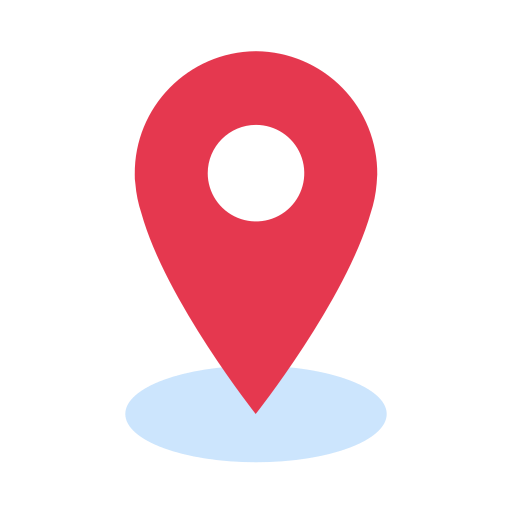
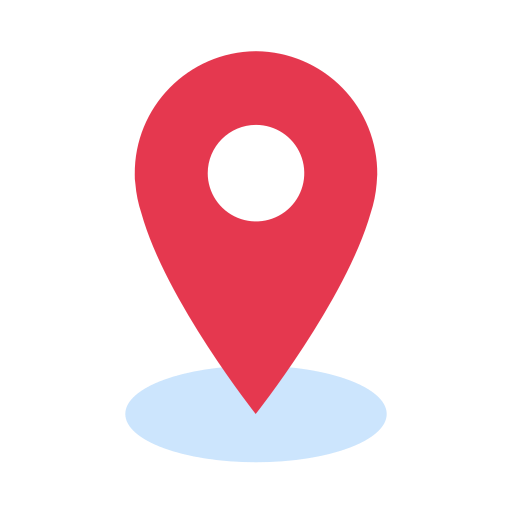

In [13]:
# 在地图中添加经纬度, add latitude and longitude in the map when click
city_map.add_child(folium.LatLngPopup())

In [14]:
city_map.save("3_.html");